In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import string
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad'] = 0.8
plt.rcParams['legend.columnspacing'] = 2
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits'] = (-3, 6)
plt.rcParams['hatch.linewidth'] = 3.0  

pbe = pd.read_csv('not_optimized/pbe/results_pbe.dat', sep="\t", header=0)
beef = pd.read_csv('not_optimized/beef/results_beef.dat', sep="\t", header=0)
rpbe = pd.read_csv('not_optimized/rpbe/results_rpbe.dat', sep="\t", header=0)
pw91 = pd.read_csv('not_optimized/pw91/results_pw91.dat', sep="\t", header=0)
pbesol = pd.read_csv('not_optimized/pbesol/results_pbesol.dat', sep="\t", header=0)
d3rpbe = pd.read_csv('not_optimized/d3rpbe/results_d3rpbe.dat', sep="\t", header=0)
d3pbe = pd.read_csv('not_optimized/d3pbe/results_d3pbe.dat', sep="\t", header=0)
d3revpbe = pd.read_csv('not_optimized/d3revpbe/results_d3revpbe.dat', sep="\t", header=0)
d3pbesol = pd.read_csv('not_optimized/d3pbesol/results_d3pbesol.dat', sep="\t", header=0)

formate=pd.read_csv('cbh2_formate.dat',sep="\t", header=0)

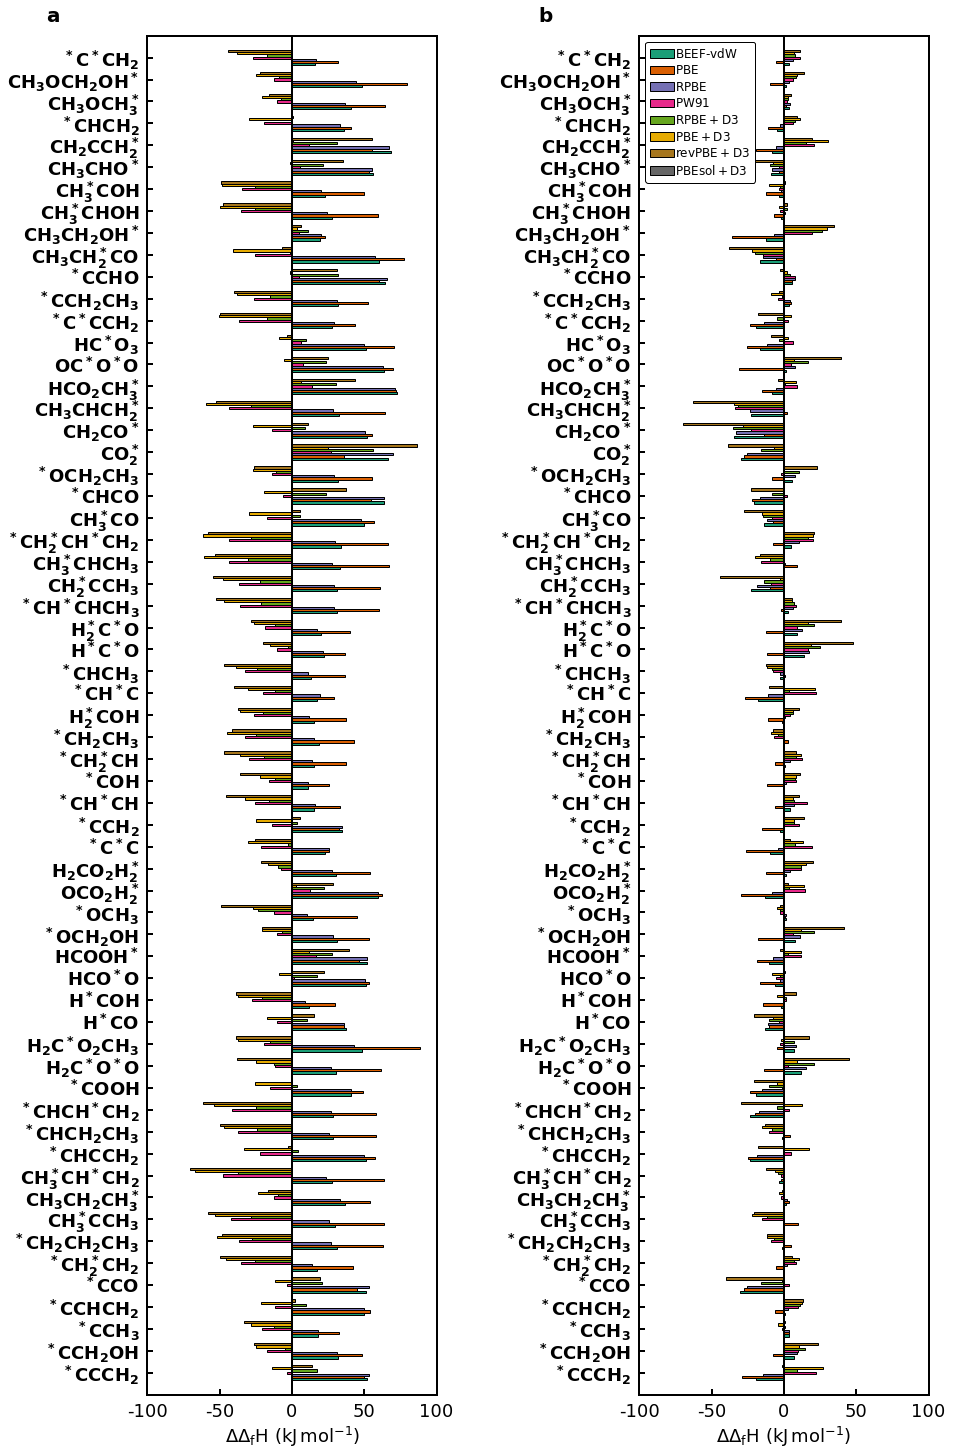

In [92]:
gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.7, hspace=0.4)
plt.rcParams['figure.figsize'] = (14, 25)
plt.rc('legend', fontsize=12)
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

spcs=pbe['species'].to_list()

entries=[]
for i in spcs:
    names='$\mathbf{' + str(i) + '}$'
    entries.append(names)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])

xval=np.linspace(0,len(pbe['species'])-1, len(pbe['species']))

n_spcs=len(pbe['hf_cbh'].to_numpy())
for i in range(n_spcs):
    ax1.barh(i-0.3,pbe['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[0],edgecolor='k')
    ax1.barh(i-0.2,rpbe['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[1],edgecolor='k')
    ax1.barh(i-0.1,pw91['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[2],edgecolor='k')
    ax1.barh(i,d3rpbe['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[3],edgecolor='k')
    ax1.barh(i+0.1,d3pbe['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[4],edgecolor='k')
    ax1.barh(i+0.2,d3revpbe['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[5],edgecolor='k')
    ax1.barh(i+0.3,d3pbesol['hf_cbh'].iloc[i]-beef['hf_cbh'].iloc[i],height=0.1,color=colors[6],edgecolor='k')
        
ax1.set_xlim([-100,100])
ax1.set_ylim([-1,xval[-1]+1])
ax1.set_xlabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
for i in range(n_spcs):
    ax0.barh(i-0.3,pbe['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[0],edgecolor='k')
    ax0.barh(i-0.2,rpbe['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[1],edgecolor='k')
    ax0.barh(i-0.1,pw91['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[2],edgecolor='k')
    ax0.barh(i,d3rpbe['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[3],edgecolor='k')
    ax0.barh(i+0.1,d3pbe['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[4],edgecolor='k')
    ax0.barh(i+0.2,d3revpbe['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[5],edgecolor='k')
    ax0.barh(i+0.3,d3pbesol['hf_old'].iloc[i]-beef['hf_old'].iloc[i],height=0.1,color=colors[6],edgecolor='k')
    
patch_beef = mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{BEEF\u2010vdW}$')
patch_pbe = mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{PBE}$')
patch_rpbe = mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{RPBE}$')
patch_pw91 = mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{PW91}$')
patch_d3rpbe = mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{RPBE+D3}$')
patch_d3pbe = mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{PBE+D3}$')
patch_d3revpbe = mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{revPBE+D3}$')
patch_d3pbesol = mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{PBEsol+D3}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[patch_beef,patch_pbe, patch_rpbe,patch_pw91,patch_d3rpbe,patch_d3pbe,
                    patch_d3revpbe, patch_d3pbesol], loc='upper left', ncol=1)

ax1.set_yticks(xval)
ax1.set_yticklabels(entries)

ax0.set_yticks(xval)
ax0.set_yticklabels(entries)

ax0.plot((0,0),(-1,xval[-1]+1),linestyle='solid',color='k',linewidth=2)
ax1.plot((0,0),(-1,xval[-1]+1),linestyle='solid',color='k',linewidth=2)

ax0.set_xlim([-100,100])
ax0.set_ylim([-1,xval[-1]+1])
ax0.set_xlabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')

import string 
ax0.text(-0.35, 1.01, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.35, 1.01, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('benchmark.pdf',bbox_inches='tight',transparent=False)
plt.show()

In [93]:
MAD_pbe=np.mean(np.abs(pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_rpbe=np.mean(np.abs(rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_pw91=np.mean(np.abs(pw91['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_d3pbe=np.mean(np.abs(d3pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))

SD_pbe=np.std(np.abs(pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_rpbe=np.std(np.abs(rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_pw91=np.std(np.abs(pw91['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_d3rpbe=np.std(np.abs(d3rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_d3pbe=np.std(np.abs(d3pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_d3revpbe=np.std(np.abs(d3revpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
SD_d3pbesol=np.std(np.abs(d3pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))

#MAD_pbesol=np.mean(np.abs(pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
print(MAD_pbe,MAD_rpbe,MAD_pw91,MAD_d3rpbe,MAD_d3pbe,MAD_d3revpbe,MAD_d3pbesol)
print(SD_pbe,SD_rpbe,SD_pw91,SD_d3rpbe)
old_MAD_pbe=np.mean(np.abs(pbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_rpbe=np.mean(np.abs(rpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_pw91=np.mean(np.abs(pw91['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_d3pbe=np.mean(np.abs(d3pbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))

old_SD_pbe=np.std(np.abs(pbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_rpbe=np.std(np.abs(rpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_pw91=np.std(np.abs(pw91['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_d3rpbe=np.std(np.abs(d3rpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_d3pbe=np.std(np.abs(d3pbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_d3revpbe=np.std(np.abs(d3revpbe['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
old_SD_d3pbesol=np.std(np.abs(d3pbesol['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))

#old_MAD_pbesol=np.mean(np.abs(pbesol['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
print(old_MAD_pbe,old_MAD_rpbe,old_MAD_pw91,old_MAD_d3rpbe,old_MAD_d3pbe,old_MAD_d3revpbe,old_MAD_d3pbesol)
print(old_SD_pbe,old_SD_rpbe,old_SD_pw91,old_SD_d3rpbe)

9.0003755737705 12.543050000000003 8.207327049180327 8.968369278688519 9.64734213114754 11.110447762295083 18.227271622950816
8.610618788276756 8.991994398891269 7.326303667065016 6.852740804246907
35.97144344262295 51.1758231147541 34.38096131147542 21.08211229508197 17.71506686885246 29.76701032786885 33.63227016393442
16.440006271243856 14.256010930795908 16.96269577742457 12.402674184846203


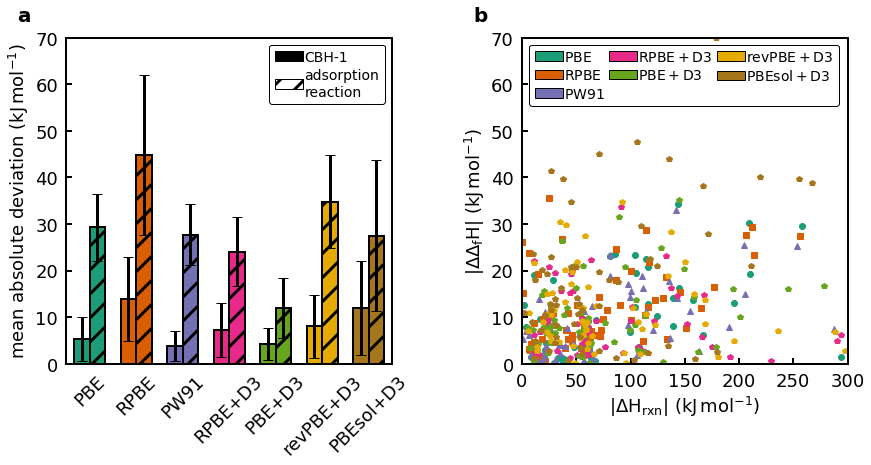

In [19]:
#hrxn = pd.read_csv('not_optimized/reaction_enthalpy.txt', sep="\t", header=0)
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['figure.figsize'] = (14, 6)
plt.rc('legend', fontsize=14)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.3
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 3
gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.4)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])

ax0.bar(0,MAD_pbe,yerr=SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2)
ax0.bar(1.5,MAD_rpbe,yerr=SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2)
ax0.bar(3,MAD_pw91,yerr=SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2)
ax0.bar(4.5,MAD_d3rpbe,yerr=SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2)
ax0.bar(6,MAD_d3pbe,yerr=SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2)
ax0.bar(7.5,MAD_d3revpbe,yerr=SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2)
ax0.bar(9,MAD_d3pbesol,yerr=SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2)

ax0.bar(0.5,old_MAD_pbe,yerr=old_SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(2,old_MAD_rpbe,yerr=old_SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(3.5,old_MAD_pw91,yerr=old_SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(5,old_MAD_d3rpbe,yerr=old_SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(6.5,old_MAD_d3pbe,yerr=old_SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(8,old_MAD_d3revpbe,yerr=old_SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(9.5,old_MAD_d3pbesol,yerr=old_SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2,hatch='/')

ax0.bar(100,old_MAD_pbe,width=0.5,color='k',edgecolor='k',label='CBH-1')
ax0.bar(100,old_MAD_pbe,width=0.5,color='w',edgecolor='k', hatch='/',label='adsorption\nreaction')
ax0.set_xlim([-0.5,10])
ax0.set_ylim([0,70])
ax0.set_xticks([0.25,1.75,3.25,4.75,6.25,7.75,9.25])
ax0.set_xticklabels(['PBE','RPBE','PW91','RPBE+D3','PBE+D3','revPBE+D3','PBEsol+D3'],rotation=45)
ax0.legend()
ax0.set_ylabel('$\mathrm{mean\ absolute\ deviation \ (kJ\,mol^{-1})}$')

patch_pbe = mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{PBE}$')
patch_rpbe = mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{RPBE}$')
patch_pw91 = mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{PW91}$')
patch_d3rpbe = mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{RPBE+D3}$')
patch_d3pbe = mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{PBE+D3}$')
patch_d3revpbe = mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{revPBE+D3}$')
patch_d3pbesol = mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{PBEsol+D3}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[patch_pbe, patch_rpbe,patch_pw91,patch_d3rpbe,patch_d3pbe,
                    patch_d3revpbe, patch_d3pbesol], loc='upper left', ncol=3)

ax1.plot(np.abs(pbe['hrxn_cbh']),np.abs(pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[0],marker='o',linestyle='None')
ax1.plot(np.abs(rpbe['hrxn_cbh']),np.abs(rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[1],marker='s',linestyle='None')
ax1.plot(np.abs(pw91['hrxn_cbh']),np.abs(pw91['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[2],marker='^',linestyle='None')
ax1.plot(np.abs(d3rpbe['hrxn_cbh']),np.abs(d3rpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[3],marker='p',linestyle='None')
ax1.plot(np.abs(d3pbe['hrxn_cbh']),np.abs(d3pbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[4],marker='p',linestyle='None')
ax1.plot(np.abs(d3revpbe['hrxn_cbh']),np.abs(d3revpbe['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[5],marker='p',linestyle='None')
ax1.plot(np.abs(d3pbesol['hrxn_cbh']),np.abs(d3pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]),color=colors[6],marker='p',linestyle='None')

ax1.set_xlim([0,300])
ax1.set_ylim([0,70])
ax1.set_ylabel('$\mathrm{|\Delta\Delta_f H|\ (kJ\,mol^{-1})}$')
ax1.set_xlabel('$\mathrm{|\Delta H_{rxn}|\ (kJ\,mol^{-1})}$')

import string 
ax0.text(-0.15, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.15, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('hrxn_scatter.pdf',transparent=False,bbox_inches='tight')
plt.show()

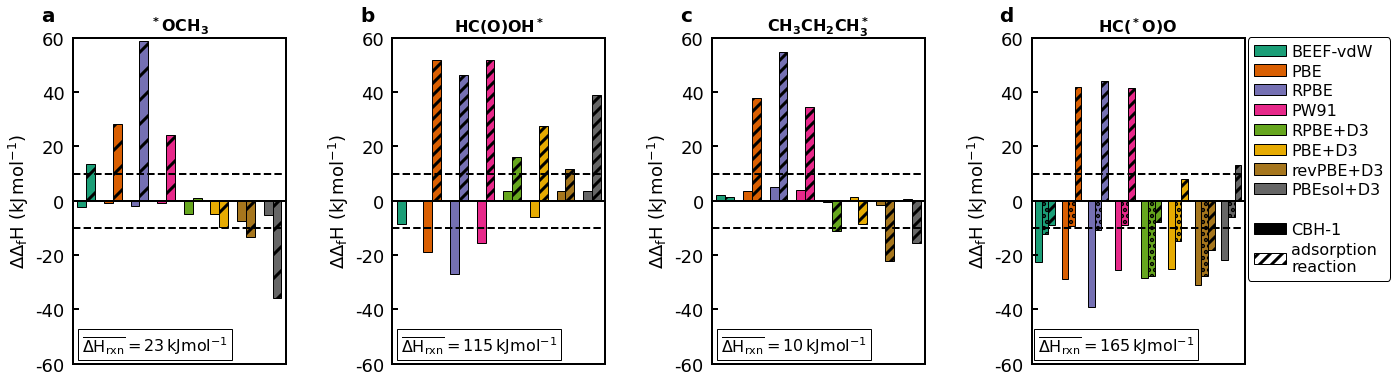

In [12]:
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['figure.figsize'] = (21, 6)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.3

hf_OCH3=-161.2
hf_CH3CH2CH3=-122.7
hf_HCOOH=-428.4
hf_HCOO=-357.3

gs = gridspec.GridSpec(nrows=1, ncols=4)
gs.update(wspace=0.5, hspace=0.4)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
idx_OCH3=21
idx_HCOOH=19
idx_CH3CH2CH3=8
idx_HCOO=18

#ax0.bar(0,hf_OCH3,width=0.5,color='k')
ax0.bar(1,beef['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[0],edgecolor='k',label='BEEF-vdW')
ax0.bar(2.5,pbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[1],edgecolor='k',label='PBE')
ax0.bar(4,rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[2],edgecolor='k',label='RPBE')
ax0.bar(5.5,pw91['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[3],edgecolor='k',label='PW91')
ax0.bar(7,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[4],edgecolor='k',label='RPBE+D3')
ax0.bar(8.5,d3pbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[5],edgecolor='k',label='RPBE+D3')
ax0.bar(10,d3revpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[6],edgecolor='k',label='RPBE+D3')
ax0.bar(11.5,d3pbesol['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[7],edgecolor='k',label='RPBE+D3')


ax0.bar(1.5,beef['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[0],edgecolor='k', hatch='/')
ax0.bar(3,pbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[1],edgecolor='k', hatch='/')
ax0.bar(4.5,rpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[2],edgecolor='k', hatch='/')
ax0.bar(6,pw91['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[3],edgecolor='k', hatch='/')
ax0.bar(7.5,d3rpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[4],edgecolor='k', hatch='/')
ax0.bar(9,d3pbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[5],edgecolor='k', hatch='/')
ax0.bar(10.5,d3revpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[6],edgecolor='k', hatch='/')
ax0.bar(12,d3pbesol['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[7],edgecolor='k', hatch='/')

ax0.set_title('$\mathbf{^*OCH_3}$',fontsize=16)
ax0.plot((0.5,12.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax0.plot((0.5,12.5),(-10,-10),linestyle='dashed',color='k',linewidth=2)
ax0.plot((0.5,12.5),(10,10),linestyle='dashed',color='k',linewidth=2)
ax0.set_xlim([0.5,12.5])
ax0.set_ylim([-60,60])
ax0.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax0.set_xticks([])
ax0.set_xticklabels([])
#ax0.set_xticks([1.25,2.75,4.25,5.75,7.25])
#ax0.set_xticklabels(['BEEF-vdW','PBE','RPBE','PW91','RPBE+D3'],rotation=90)

ax1.bar(1,beef['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[0],edgecolor='k')
ax1.bar(2.5,pbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[1],edgecolor='k')
ax1.bar(4,rpbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[2],edgecolor='k')
ax1.bar(5.5,pw91['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[3],edgecolor='k')
ax1.bar(7,d3rpbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[4],edgecolor='k')
ax1.bar(8.5,d3pbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[5],edgecolor='k')
ax1.bar(10,d3revpbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[6],edgecolor='k')
ax1.bar(11.5,d3revpbe['hf_cbh'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[7],edgecolor='k')



ax1.bar(1.5,beef['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[0],edgecolor='k', hatch='//')
ax1.bar(3,pbe['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[1],edgecolor='k', hatch='//')
ax1.bar(4.5,rpbe['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[2],edgecolor='k', hatch='//')
ax1.bar(6,pw91['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[3],edgecolor='k', hatch='//')
ax1.bar(7.5,d3rpbe['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[4],edgecolor='k', hatch='//')
ax1.bar(9,d3pbe['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[5],edgecolor='k', hatch='//')
ax1.bar(10.5,d3revpbe['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[6],edgecolor='k', hatch='//')
ax1.bar(12,d3pbesol['hf_old'].iloc[idx_HCOOH]-hf_HCOOH,width=0.5,color=colors[7],edgecolor='k', hatch='//')

ax1.set_title('$\mathbf{HC(O)OH^*}$',fontsize=16)
ax1.plot((0.5,12.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax1.plot((0.5,12.5),(-10,-10),linestyle='dashed',color='k',linewidth=2)
ax1.plot((0.5,12.5),(10,10),linestyle='dashed',color='k',linewidth=2)
ax1.set_xlim([0.5,12.5])
ax1.set_ylim([-60,60])
ax1.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax1.set_xticks([])
ax1.set_xticklabels([])

ax2.bar(1,beef['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[0],edgecolor='k')
ax2.bar(2.5,pbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[1],edgecolor='k')
ax2.bar(4,rpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[2],edgecolor='k')
ax2.bar(5.5,pw91['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[3],edgecolor='k')
ax2.bar(7,d3rpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[4],edgecolor='k')
ax2.bar(8.5,d3pbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[5],edgecolor='k')
ax2.bar(10,d3revpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[6],edgecolor='k')
ax2.bar(11.5,d3pbesol['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[7],edgecolor='k')

ax2.bar(1.5,beef['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[0],edgecolor='k', hatch='//')
ax2.bar(3,pbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[1],edgecolor='k', hatch='//')
ax2.bar(4.5,rpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[2],edgecolor='k', hatch='//')
ax2.bar(6,pw91['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[3],edgecolor='k', hatch='//')
ax2.bar(7.5,d3rpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[4],edgecolor='k', hatch='//')
ax2.bar(9,d3pbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[5],edgecolor='k', hatch='//')
ax2.bar(10.5,d3revpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[6],edgecolor='k', hatch='//')
ax2.bar(12,d3pbesol['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[7],edgecolor='k', hatch='//')


ax2.set_title('$\mathbf{CH_3CH_2CH_3^*}$',fontsize=16)
ax2.plot((0.5,12.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax2.plot((0.5,12.5),(-10,-10),linestyle='dashed',color='k',linewidth=2)
ax2.plot((0.5,12.5),(10,10),linestyle='dashed',color='k',linewidth=2)
ax2.set_xlim([0.5,12.5])
ax2.set_ylim([-60,60])
ax2.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax2.set_xticks([])
ax2.set_xticklabels([])

ax3.bar(1,beef['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[0],edgecolor='k',label='BEEF-vdW')
ax3.bar(3,pbe['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[1],edgecolor='k',label='PBE')
ax3.bar(5,rpbe['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[2],edgecolor='k',label='RPBE')
ax3.bar(7,pw91['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[3],edgecolor='k',label='PW91')
ax3.bar(9,d3rpbe['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[4],edgecolor='k',label='RPBE+D3')
ax3.bar(11,d3pbe['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[5],edgecolor='k',label='PBE+D3')
ax3.bar(13,d3revpbe['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[6],edgecolor='k',label='revPBE+D3')
ax3.bar(15,d3pbesol['hf_cbh'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[7],edgecolor='k',label='PBEsol+D3')

ax3.bar(1.5,formate['hf_cbh'].iloc[0]-hf_HCOO,width=0.5,color=colors[0],edgecolor='k', hatch='..')
ax3.bar(3.5,formate['hf_cbh'].iloc[1]-hf_HCOO,width=0.5,color=colors[1],edgecolor='k', hatch='..')
ax3.bar(5.5,formate['hf_cbh'].iloc[2]-hf_HCOO,width=0.5,color=colors[2],edgecolor='k', hatch='..')
ax3.bar(7.5,formate['hf_cbh'].iloc[3]-hf_HCOO,width=0.5,color=colors[3],edgecolor='k', hatch='..')
ax3.bar(9.5,formate['hf_cbh'].iloc[4]-hf_HCOO,width=0.5,color=colors[4],edgecolor='k', hatch='..')
ax3.bar(11.5,formate['hf_cbh'].iloc[5]-hf_HCOO,width=0.5,color=colors[5],edgecolor='k', hatch='..')
ax3.bar(13.5,formate['hf_cbh'].iloc[6]-hf_HCOO,width=0.5,color=colors[6],edgecolor='k', hatch='..')
ax3.bar(15.5,formate['hf_cbh'].iloc[7]-hf_HCOO,width=0.5,color=colors[7],edgecolor='k', hatch='..')

ax3.bar(2,beef['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[0],edgecolor='k', hatch='//')
ax3.bar(4,pbe['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[1],edgecolor='k', hatch='//')
ax3.bar(6,rpbe['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[2],edgecolor='k', hatch='//')
ax3.bar(8,pw91['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[3],edgecolor='k', hatch='//')
ax3.bar(10,d3rpbe['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[4],edgecolor='k', hatch='//')
ax3.bar(12,d3pbe['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[5],edgecolor='k', hatch='//')
ax3.bar(14,d3revpbe['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[6],edgecolor='k', hatch='//')
ax3.bar(16,d3pbesol['hf_old'].iloc[idx_HCOO]-hf_HCOO,width=0.5,color=colors[7],edgecolor='k', hatch='//')


ax3.bar(100,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='w',edgecolor='w',label=' ')
ax3.bar(100,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='k',edgecolor='k',label='CBH-1')
ax3.bar(100,beef['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='w',edgecolor='k', hatch='//',label='adsorption\nreaction')

ax3.set_title('$\mathbf{HC(^*O)O}$',fontsize=16)
ax3.plot((0.5,17.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax3.plot((0.5,17.5),(-10,-10),linestyle='dashed',color='k',linewidth=2)
ax3.plot((0.5,17.5),(10,10),linestyle='dashed',color='k',linewidth=2)
ax3.set_xlim([0.5,16.5])
ax3.set_ylim([-60,60])
ax3.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax3.set_xticks([])
ax3.set_xticklabels([])
ax3.legend(loc='upper right',bbox_to_anchor=(1.72,1.025))


hrxn_och3=np.array([beef['hrxn_cbh'].iloc[idx_OCH3],pbe['hrxn_cbh'].iloc[idx_OCH3],rpbe['hrxn_cbh'].iloc[idx_OCH3],
                 pw91['hrxn_cbh'].iloc[idx_OCH3],d3rpbe['hrxn_cbh'].iloc[idx_OCH3],d3pbe['hrxn_cbh'].iloc[idx_OCH3],
                 d3revpbe['hrxn_cbh'].iloc[idx_OCH3],d3pbesol['hrxn_cbh'].iloc[idx_OCH3]])
hrxn_hcooh=np.array([beef['hrxn_cbh'].iloc[idx_HCOOH],pbe['hrxn_cbh'].iloc[idx_HCOOH],rpbe['hrxn_cbh'].iloc[idx_HCOOH],
                 pw91['hrxn_cbh'].iloc[idx_HCOOH],d3rpbe['hrxn_cbh'].iloc[idx_HCOOH],d3pbe['hrxn_cbh'].iloc[idx_HCOOH],
                 d3revpbe['hrxn_cbh'].iloc[idx_HCOOH],d3pbesol['hrxn_cbh'].iloc[idx_HCOOH]])
hrxn_ch3ch2ch3=np.array([beef['hrxn_cbh'].iloc[idx_CH3CH2CH3],pbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],rpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],
                 pw91['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3rpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3pbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],
                 d3revpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3pbesol['hrxn_cbh'].iloc[idx_CH3CH2CH3]])
hrxn_hcoo=np.array([beef['hrxn_cbh'].iloc[idx_HCOO],pbe['hrxn_cbh'].iloc[idx_HCOO],rpbe['hrxn_cbh'].iloc[idx_HCOO],
                 pw91['hrxn_cbh'].iloc[idx_HCOO],d3rpbe['hrxn_cbh'].iloc[idx_HCOO],d3pbe['hrxn_cbh'].iloc[idx_HCOO],
                 d3revpbe['hrxn_cbh'].iloc[idx_HCOO],d3pbesol['hrxn_cbh'].iloc[idx_HCOO]])

props=dict(facecolor='w')
ax0.text(1, -57, '$\mathrm{\overline{\Delta H_{rxn}}='+str(int(np.round(np.mean(hrxn_och3),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='16')
ax1.text(1, -57, '$\mathrm{\overline{\Delta H_{rxn}}='+str(int(np.round(np.mean(hrxn_hcooh),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='16')
ax2.text(1, -57, '$\mathrm{\overline{\Delta H_{rxn}}='+str(int(np.round(np.mean(hrxn_ch3ch2ch3),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='16')
ax3.text(1, -57, '$\mathrm{\overline{\Delta H_{rxn}}='+str(int(np.round(np.mean(hrxn_hcoo),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='16')

import string 
ax0.text(-0.15, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.15, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')
ax2.text(-0.15, 1.05, string.ascii_lowercase[2], transform=ax2.transAxes, size=20, weight='bold')
ax3.text(-0.15, 1.05, string.ascii_lowercase[3], transform=ax3.transAxes, size=20, weight='bold')


#plt.savefig('exp_benchmark.pdf',transparent=False,bbox_inches='tight')
plt.show()

5.35199886987705 13.862133542008195 3.8219964682377023 7.222490244877049 4.252204736680335 8.047049056352462 11.931411892418039
4.778276925324996 8.978476489870472 3.1173460569970555 5.791432065797993
29.321644100409838 44.85651557581967 27.731161969262295 24.088731309426233 11.946291817622951 34.7557604897541 27.484842375
7.192693152232481 17.160890281293803 6.575554355222107 7.3493135574784


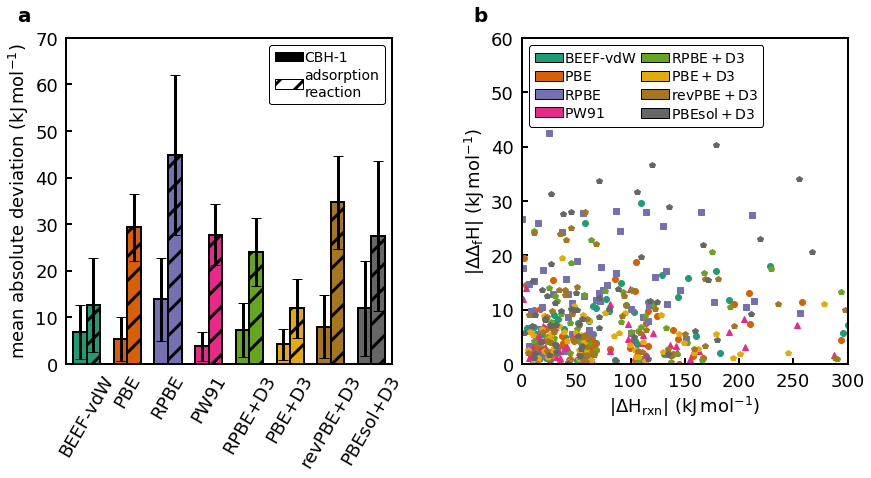

In [18]:
#hrxn = pd.read_csv('not_optimized/reaction_enthalpy.txt', sep="\t", header=0)
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['figure.figsize'] = (14, 6)
plt.rc('legend', fontsize=14)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.3
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 3
gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.4)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])

n_spcs=len(pbe['hf_cbh'].to_numpy())
hf_cbh_list=np.zeros(n_spcs)
hf_old_list=np.zeros(n_spcs)
for i in range(n_spcs):
    x=np.array([beef['hf_cbh'].iloc[i],pbe['hf_cbh'].iloc[i],rpbe['hf_cbh'].iloc[i],
                 pw91['hf_cbh'].iloc[i],d3rpbe['hf_cbh'].iloc[i],d3pbe['hf_cbh'].iloc[i],
                 d3revpbe['hf_cbh'].iloc[i],d3pbesol['hf_cbh'].iloc[i]])
    hf_cbh_list[i]=np.mean(x)
    y=np.array([beef['hf_old'].iloc[i],pbe['hf_old'].iloc[i],rpbe['hf_old'].iloc[i],
                 pw91['hf_old'].iloc[i],d3rpbe['hf_old'].iloc[i],d3pbe['hf_old'].iloc[i],
                 d3revpbe['hf_old'].iloc[i],d3pbesol['hf_old'].iloc[i]])
    hf_old_list[i]=np.mean(y)
    
MAD_beef=np.mean(np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_pbe=np.mean(np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_rpbe=np.mean(np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_pw91=np.mean(np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3pbe=np.mean(np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list))

SD_beef=np.std(np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list))
SD_pbe=np.std(np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_rpbe=np.std(np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_pw91=np.std(np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3rpbe=np.std(np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3pbe=np.std(np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3revpbe=np.std(np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3pbesol=np.std(np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list))

#MAD_pbesol=np.mean(np.abs(pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
print(MAD_pbe,MAD_rpbe,MAD_pw91,MAD_d3rpbe,MAD_d3pbe,MAD_d3revpbe,MAD_d3pbesol)
print(SD_pbe,SD_rpbe,SD_pw91,SD_d3rpbe)
old_MAD_beef=np.mean(np.abs(beef['hf_old'].iloc[:]-hf_old_list))
old_MAD_pbe=np.mean(np.abs(pbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_rpbe=np.mean(np.abs(rpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_pw91=np.mean(np.abs(pw91['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3pbe=np.mean(np.abs(d3pbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_old'].iloc[:]-hf_old_list))

old_SD_beef=np.std(np.abs(beef['hf_old'].iloc[:]-hf_old_list))
old_SD_pbe=np.std(np.abs(pbe['hf_old'].iloc[:]-hf_old_list))
old_SD_rpbe=np.std(np.abs(rpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_pw91=np.std(np.abs(pw91['hf_old'].iloc[:]-hf_old_list))
old_SD_d3rpbe=np.std(np.abs(d3rpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3pbe=np.std(np.abs(d3pbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3revpbe=np.std(np.abs(d3revpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3pbesol=np.std(np.abs(d3pbesol['hf_old'].iloc[:]-hf_old_list))

#old_MAD_pbesol=np.mean(np.abs(pbesol['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
print(old_MAD_pbe,old_MAD_rpbe,old_MAD_pw91,old_MAD_d3rpbe,old_MAD_d3pbe,old_MAD_d3revpbe,old_MAD_d3pbesol)
print(old_SD_pbe,old_SD_rpbe,old_SD_pw91,old_SD_d3rpbe)

ax0.bar(0,MAD_beef,yerr=SD_beef, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2)    
ax0.bar(1.5,MAD_pbe,yerr=SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2)
ax0.bar(3,MAD_rpbe,yerr=SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2)
ax0.bar(4.5,MAD_pw91,yerr=SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2)
ax0.bar(6,MAD_d3rpbe,yerr=SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2)
ax0.bar(7.5,MAD_d3pbe,yerr=SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2)
ax0.bar(9,MAD_d3revpbe,yerr=SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2)
ax0.bar(10.5,MAD_d3pbesol,yerr=SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[7],edgecolor='k',linewidth=2)

ax0.bar(0.5,old_MAD_beef,yerr=old_SD_beef, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(2,old_MAD_pbe,yerr=old_SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(3.5,old_MAD_rpbe,yerr=old_SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(5,old_MAD_pw91,yerr=old_SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(6.5,old_MAD_d3rpbe,yerr=old_SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(8,old_MAD_d3pbe,yerr=old_SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(9.5,old_MAD_d3revpbe,yerr=old_SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(11,old_MAD_d3pbesol,yerr=old_SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[7],edgecolor='k',linewidth=2,hatch='/')

ax0.bar(100,old_MAD_pbe,width=0.5,color='k',edgecolor='k',label='CBH-1')
ax0.bar(100,old_MAD_pbe,width=0.5,color='w',edgecolor='k', hatch='/',label='adsorption\nreaction')
ax0.set_xlim([-0.5,11.5])
ax0.set_ylim([0,70])
ax0.set_xticks([0.25,1.75,3.25,4.75,6.25,7.75,9.25,10.75])
ax0.set_xticklabels(['BEEF-vdW','PBE','RPBE','PW91','RPBE+D3','PBE+D3','revPBE+D3','PBEsol+D3'],rotation=60)
ax0.legend()
ax0.set_ylabel('$\mathrm{mean\ absolute\ deviation \ (kJ\,mol^{-1})}$')

patch_beef = mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{BEEF\u2010vdW}$')
patch_pbe = mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{PBE}$')
patch_rpbe = mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{RPBE}$')
patch_pw91 = mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{PW91}$')
patch_d3rpbe = mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{RPBE+D3}$')
patch_d3pbe = mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{PBE+D3}$')
patch_d3revpbe = mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{revPBE+D3}$')
patch_d3pbesol = mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{PBEsol+D3}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[patch_beef,patch_pbe, patch_rpbe,patch_pw91,patch_d3rpbe,patch_d3pbe,
                    patch_d3revpbe, patch_d3pbesol], loc='upper left', ncol=2)

ax1.plot(np.abs(beef['hrxn_cbh']),np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[0],marker='o',linestyle='None')
ax1.plot(np.abs(pbe['hrxn_cbh']),np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[1],marker='o',linestyle='None')
ax1.plot(np.abs(rpbe['hrxn_cbh']),np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[2],marker='s',linestyle='None')
ax1.plot(np.abs(pw91['hrxn_cbh']),np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[3],marker='^',linestyle='None')
ax1.plot(np.abs(d3rpbe['hrxn_cbh']),np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[4],marker='p',linestyle='None')
ax1.plot(np.abs(d3pbe['hrxn_cbh']),np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[5],marker='p',linestyle='None')
ax1.plot(np.abs(d3revpbe['hrxn_cbh']),np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[6],marker='p',linestyle='None')
ax1.plot(np.abs(d3pbesol['hrxn_cbh']),np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[7],marker='p',linestyle='None')

ax1.set_xlim([0,300])
ax1.set_ylim([0,60])
ax1.set_ylabel('$\mathrm{|\Delta\Delta_f H|\ (kJ\,mol^{-1})}$')
ax1.set_xlabel('$\mathrm{|\Delta H_{rxn}|\ (kJ\,mol^{-1})}$')

import string 
ax0.text(-0.15, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.15, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('avg_hrxn_scatter.pdf',transparent=False,bbox_inches='tight')
plt.show()

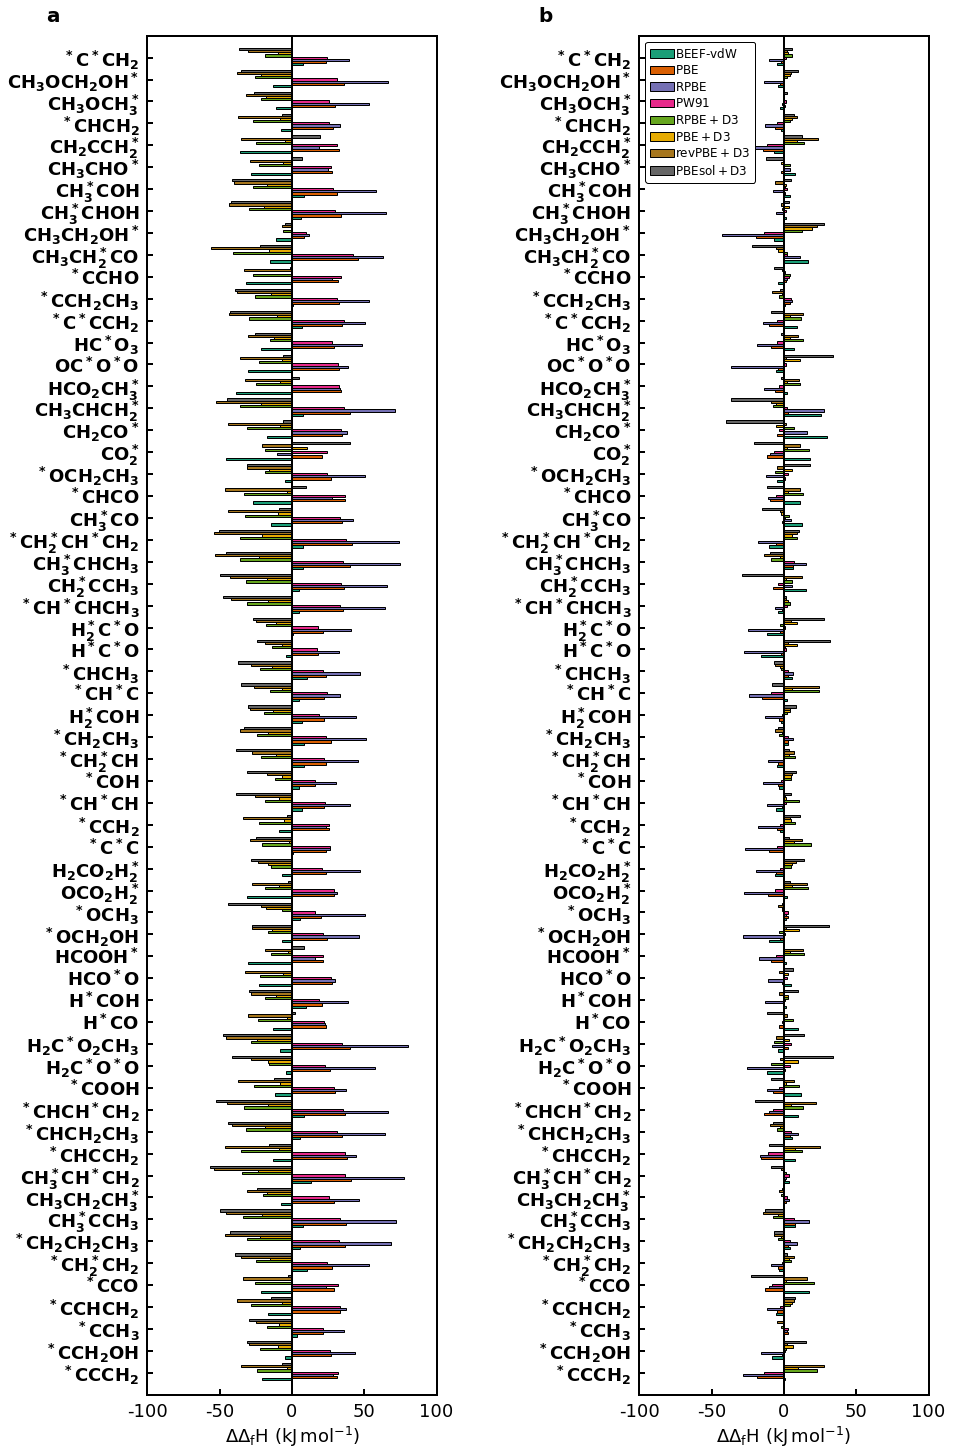

In [91]:
gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.7, hspace=0.4)
plt.rcParams['figure.figsize'] = (14, 25)
plt.rc('legend', fontsize=12)
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

spcs=pbe['species'].to_list()

entries=[]
for i in spcs:
    names='$\mathbf{' + str(i) + '}$'
    entries.append(names)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])

xval=np.linspace(0,len(pbe['species'])-1, len(pbe['species']))

n_spcs=len(pbe['hf_cbh'].to_numpy())
for i in range(n_spcs):
    ax1.barh(i-0.3,beef['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[0],edgecolor='k')
    ax1.barh(i-0.2,pbe['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[1],edgecolor='k')
    ax1.barh(i-0.1,rpbe['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[2],edgecolor='k')
    ax1.barh(i,pw91['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[3],edgecolor='k')
    ax1.barh(i+0.1,d3rpbe['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[4],edgecolor='k')
    ax1.barh(i+0.2,d3pbe['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[5],edgecolor='k')
    ax1.barh(i+0.3,d3revpbe['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[6],edgecolor='k')
    ax1.barh(i+0.4,d3pbesol['hf_cbh'].iloc[i]-hf_cbh_list[i],height=0.1,color=colors[7],edgecolor='k')
        
ax1.set_xlim([-100,100])
ax1.set_ylim([-1,xval[-1]+1])
ax1.set_xlabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
for i in range(n_spcs):
    ax0.barh(i-0.3,beef['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[0],edgecolor='k')
    ax0.barh(i-0.2,pbe['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[1],edgecolor='k')
    ax0.barh(i-0.1,rpbe['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[2],edgecolor='k')
    ax0.barh(i,pw91['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[3],edgecolor='k')
    ax0.barh(i+0.1,d3rpbe['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[4],edgecolor='k')
    ax0.barh(i+0.2,d3pbe['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[5],edgecolor='k')
    ax0.barh(i+0.3,d3revpbe['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[6],edgecolor='k')
    ax0.barh(i+0.4,d3pbesol['hf_old'].iloc[i]-hf_old_list[i],height=0.1,color=colors[7],edgecolor='k')
    
patch_beef = mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{BEEF\u2010vdW}$')
patch_pbe = mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{PBE}$')
patch_rpbe = mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{RPBE}$')
patch_pw91 = mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{PW91}$')
patch_d3rpbe = mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{RPBE+D3}$')
patch_d3pbe = mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{PBE+D3}$')
patch_d3revpbe = mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{revPBE+D3}$')
patch_d3pbesol = mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{PBEsol+D3}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[patch_beef,patch_pbe, patch_rpbe,patch_pw91,patch_d3rpbe,patch_d3pbe,
                    patch_d3revpbe, patch_d3pbesol], loc='upper left', ncol=1)
ax1.set_yticks(xval)
ax1.set_yticklabels(entries)

ax0.set_yticks(xval)
ax0.set_yticklabels(entries)

ax0.plot((0,0),(-1,xval[-1]+1),linestyle='solid',color='k',linewidth=2)
ax1.plot((0,0),(-1,xval[-1]+1),linestyle='solid',color='k',linewidth=2)

ax0.set_xlim([-100,100])
ax0.set_ylim([-1,xval[-1]+1])
ax0.set_xlabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')

import string 
ax0.text(-0.35, 1.01, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.35, 1.01, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('avg_benchmark.pdf',bbox_inches='tight',transparent=False)
plt.show()

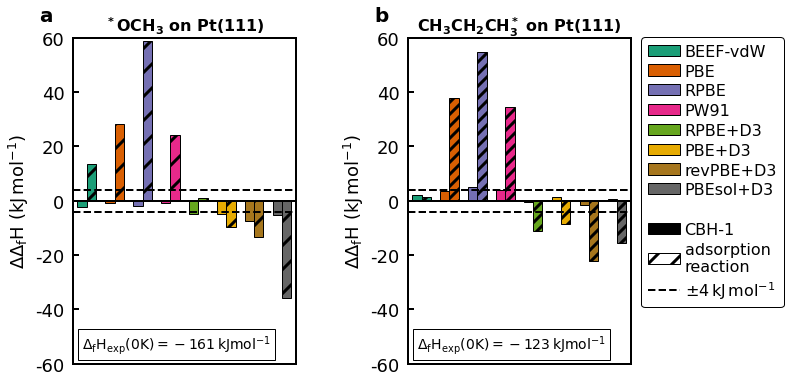

In [17]:
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.3

hf_OCH3=-161.2
hf_CH3CH2CH3=-122.7
hf_HCOOH=-428.4
hf_HCOO=-357

gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.5, hspace=0.4)
ax0 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

idx_OCH3=21
idx_HCOOH=19
idx_CH3CH2CH3=8
idx_HCOO=18

#ax0.bar(0,hf_OCH3,width=0.5,color='k')
ax0.bar(1,beef['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[0],edgecolor='k',label='BEEF-vdW')
ax0.bar(2.5,pbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[1],edgecolor='k',label='PBE')
ax0.bar(4,rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[2],edgecolor='k',label='RPBE')
ax0.bar(5.5,pw91['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[3],edgecolor='k',label='PW91')
ax0.bar(7,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[4],edgecolor='k',label='RPBE+D3')
ax0.bar(8.5,d3pbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[5],edgecolor='k',label='RPBE+D3')
ax0.bar(10,d3revpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[6],edgecolor='k',label='RPBE+D3')
ax0.bar(11.5,d3pbesol['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[7],edgecolor='k',label='RPBE+D3')


ax0.bar(1.5,beef['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[0],edgecolor='k', hatch='/')
ax0.bar(3,pbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[1],edgecolor='k', hatch='/')
ax0.bar(4.5,rpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[2],edgecolor='k', hatch='/')
ax0.bar(6,pw91['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[3],edgecolor='k', hatch='/')
ax0.bar(7.5,d3rpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[4],edgecolor='k', hatch='/')
ax0.bar(9,d3pbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[5],edgecolor='k', hatch='/')
ax0.bar(10.5,d3revpbe['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[6],edgecolor='k', hatch='/')
ax0.bar(12,d3pbesol['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color=colors[7],edgecolor='k', hatch='/')

ax0.set_title('$\mathbf{^*OCH_3\ on\ Pt(111)}$',fontsize=16)
ax0.plot((0.5,12.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax0.plot((0.5,12.5),(-4,-4),linestyle='dashed',color='k',linewidth=2)
ax0.plot((0.5,12.5),(4,4),linestyle='dashed',color='k',linewidth=2)
ax0.set_xlim([0.5,12.5])
ax0.set_ylim([-60,60])
ax0.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax0.set_xticks([])
ax0.set_xticklabels([])


ax2.bar(1,beef['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[0],edgecolor='k',label='BEEF-vdW')
ax2.bar(2.5,pbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[1],edgecolor='k',label='PBE')
ax2.bar(4,rpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[2],edgecolor='k',label='RPBE')
ax2.bar(5.5,pw91['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[3],edgecolor='k',label='PW91')
ax2.bar(7,d3rpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[4],edgecolor='k',label='RPBE+D3')
ax2.bar(8.5,d3pbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[5],edgecolor='k',label='PBE+D3')
ax2.bar(10,d3revpbe['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[6],edgecolor='k',label='revPBE+D3')
ax2.bar(11.5,d3pbesol['hf_cbh'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[7],edgecolor='k',label='PBEsol+D3')

ax2.bar(1.5,beef['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[0],edgecolor='k', hatch='//')
ax2.bar(3,pbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[1],edgecolor='k', hatch='//')
ax2.bar(4.5,rpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[2],edgecolor='k', hatch='//')
ax2.bar(6,pw91['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[3],edgecolor='k', hatch='//')
ax2.bar(7.5,d3rpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[4],edgecolor='k', hatch='//')
ax2.bar(9,d3pbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[5],edgecolor='k', hatch='//')
ax2.bar(10.5,d3revpbe['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[6],edgecolor='k', hatch='//')
ax2.bar(12,d3pbesol['hf_old'].iloc[idx_CH3CH2CH3]-hf_CH3CH2CH3,width=0.5,color=colors[7],edgecolor='k', hatch='//')


ax2.set_title('$\mathbf{CH_3CH_2CH_3^*\ on\ Pt(111)}$',fontsize=16)
ax2.plot((0.5,12.5),(0,0),linestyle='solid',color='k',linewidth=2)
ax2.plot((0.5,12.5),(-4,-4),linestyle='dashed',color='k',linewidth=2)
ax2.plot((0.5,12.5),(4,4),linestyle='dashed',color='k',linewidth=2)
ax2.set_xlim([0.5,12.5])
ax2.set_ylim([-60,60])
ax2.set_ylabel('$\mathrm{\Delta\Delta_f H\ (kJ\,mol^{-1})}$')
ax2.set_xticks([])
ax2.set_xticklabels([])


ax2.bar(100,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='w',edgecolor='w',label=' ')
ax2.bar(100,d3rpbe['hf_cbh'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='k',edgecolor='k',label='CBH-1')
ax2.bar(100,beef['hf_old'].iloc[idx_OCH3]-hf_OCH3,width=0.5,color='w',edgecolor='k', hatch='/',label='adsorption\nreaction')
ax2.plot((0.5,12.5),(4,4),linestyle='dashed',color='k',linewidth=2,label='$\mathrm{\u00b1 4\,kJ\,mol^{-1}}$')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=[handles[1],handles[2],handles[3],handles[4],handles[5],
                    handles[6],handles[7],handles[8],handles[9],
                    handles[10],handles[11],handles[0]], loc='upper right',bbox_to_anchor=(1.72,1.025), ncol=1)


hrxn_och3=np.array([beef['hrxn_cbh'].iloc[idx_OCH3],pbe['hrxn_cbh'].iloc[idx_OCH3],rpbe['hrxn_cbh'].iloc[idx_OCH3],
                 pw91['hrxn_cbh'].iloc[idx_OCH3],d3rpbe['hrxn_cbh'].iloc[idx_OCH3],d3pbe['hrxn_cbh'].iloc[idx_OCH3],
                 d3revpbe['hrxn_cbh'].iloc[idx_OCH3],d3pbesol['hrxn_cbh'].iloc[idx_OCH3]])
hrxn_hcooh=np.array([beef['hrxn_cbh'].iloc[idx_HCOOH],pbe['hrxn_cbh'].iloc[idx_HCOOH],rpbe['hrxn_cbh'].iloc[idx_HCOOH],
                 pw91['hrxn_cbh'].iloc[idx_HCOOH],d3rpbe['hrxn_cbh'].iloc[idx_HCOOH],d3pbe['hrxn_cbh'].iloc[idx_HCOOH],
                 d3revpbe['hrxn_cbh'].iloc[idx_HCOOH],d3pbesol['hrxn_cbh'].iloc[idx_HCOOH]])
hrxn_ch3ch2ch3=np.array([beef['hrxn_cbh'].iloc[idx_CH3CH2CH3],pbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],rpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],
                 pw91['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3rpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3pbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],
                 d3revpbe['hrxn_cbh'].iloc[idx_CH3CH2CH3],d3pbesol['hrxn_cbh'].iloc[idx_CH3CH2CH3]])
hrxn_hcoo=np.array([beef['hrxn_cbh'].iloc[idx_HCOO],pbe['hrxn_cbh'].iloc[idx_HCOO],rpbe['hrxn_cbh'].iloc[idx_HCOO],
                 pw91['hrxn_cbh'].iloc[idx_HCOO],d3rpbe['hrxn_cbh'].iloc[idx_HCOO],d3pbe['hrxn_cbh'].iloc[idx_HCOO],
                 d3revpbe['hrxn_cbh'].iloc[idx_HCOO],d3pbesol['hrxn_cbh'].iloc[idx_HCOO]])

props=dict(facecolor='w')
ax0.text(1, -57, '$\mathrm{\Delta_f H_{exp}(0K)='+str(int(np.round(np.mean(hf_OCH3),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='14')
ax2.text(1, -57, '$\mathrm{\Delta_f H_{exp}(0K)='+str(int(np.round(np.mean(hf_CH3CH2CH3),0)))+'\, kJ mol^{-1}}$', ha='left',va='bottom',bbox=props, fontsize='14')

import string 
ax0.text(-0.15, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax2.text(-0.15, 1.05, string.ascii_lowercase[1], transform=ax2.transAxes, size=20, weight='bold')


plt.savefig('exp_benchmark_aiche.pdf',transparent=False,bbox_inches='tight')
plt.show()

5.35199886987705 13.862133542008195 3.8219964682377023 7.222490244877049 4.252204736680335 8.047049056352462 11.931411892418039
4.778276925324996 8.978476489870472 3.1173460569970555 5.791432065797993
29.321644100409838 44.85651557581967 27.731161969262295 24.088731309426233 11.946291817622951 34.7557604897541 27.484842375
7.192693152232481 17.160890281293803 6.575554355222107 7.3493135574784


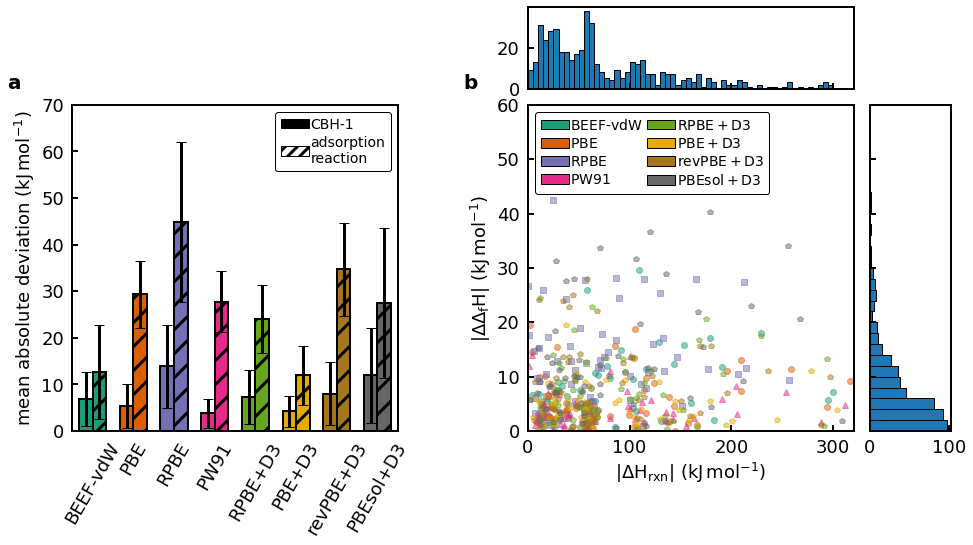

In [2]:
#hrxn = pd.read_csv('not_optimized/reaction_enthalpy.txt', sep="\t", header=0)
colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['figure.figsize'] = (14, 6)
plt.rc('legend', fontsize=14)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.3
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 3
gs = gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.4)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])

n_spcs=len(pbe['hf_cbh'].to_numpy())
hf_cbh_list=np.zeros(n_spcs)
hf_old_list=np.zeros(n_spcs)
for i in range(n_spcs):
    x=np.array([beef['hf_cbh'].iloc[i],pbe['hf_cbh'].iloc[i],rpbe['hf_cbh'].iloc[i],
                 pw91['hf_cbh'].iloc[i],d3rpbe['hf_cbh'].iloc[i],d3pbe['hf_cbh'].iloc[i],
                 d3revpbe['hf_cbh'].iloc[i],d3pbesol['hf_cbh'].iloc[i]])
    hf_cbh_list[i]=np.mean(x)
    y=np.array([beef['hf_old'].iloc[i],pbe['hf_old'].iloc[i],rpbe['hf_old'].iloc[i],
                 pw91['hf_old'].iloc[i],d3rpbe['hf_old'].iloc[i],d3pbe['hf_old'].iloc[i],
                 d3revpbe['hf_old'].iloc[i],d3pbesol['hf_old'].iloc[i]])
    hf_old_list[i]=np.mean(y)
    
MAD_beef=np.mean(np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_pbe=np.mean(np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_rpbe=np.mean(np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_pw91=np.mean(np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3pbe=np.mean(np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list))
MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list))

SD_beef=np.std(np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list))
SD_pbe=np.std(np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_rpbe=np.std(np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_pw91=np.std(np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3rpbe=np.std(np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3pbe=np.std(np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3revpbe=np.std(np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list))
SD_d3pbesol=np.std(np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list))

#MAD_pbesol=np.mean(np.abs(pbesol['hf_cbh'].iloc[:]-beef['hf_cbh'].iloc[:]))
print(MAD_pbe,MAD_rpbe,MAD_pw91,MAD_d3rpbe,MAD_d3pbe,MAD_d3revpbe,MAD_d3pbesol)
print(SD_pbe,SD_rpbe,SD_pw91,SD_d3rpbe)
old_MAD_beef=np.mean(np.abs(beef['hf_old'].iloc[:]-hf_old_list))
old_MAD_pbe=np.mean(np.abs(pbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_rpbe=np.mean(np.abs(rpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_pw91=np.mean(np.abs(pw91['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3rpbe=np.mean(np.abs(d3rpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3pbe=np.mean(np.abs(d3pbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3revpbe=np.mean(np.abs(d3revpbe['hf_old'].iloc[:]-hf_old_list))
old_MAD_d3pbesol=np.mean(np.abs(d3pbesol['hf_old'].iloc[:]-hf_old_list))

old_SD_beef=np.std(np.abs(beef['hf_old'].iloc[:]-hf_old_list))
old_SD_pbe=np.std(np.abs(pbe['hf_old'].iloc[:]-hf_old_list))
old_SD_rpbe=np.std(np.abs(rpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_pw91=np.std(np.abs(pw91['hf_old'].iloc[:]-hf_old_list))
old_SD_d3rpbe=np.std(np.abs(d3rpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3pbe=np.std(np.abs(d3pbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3revpbe=np.std(np.abs(d3revpbe['hf_old'].iloc[:]-hf_old_list))
old_SD_d3pbesol=np.std(np.abs(d3pbesol['hf_old'].iloc[:]-hf_old_list))

#old_MAD_pbesol=np.mean(np.abs(pbesol['hf_old'].iloc[:]-beef['hf_old'].iloc[:]))
print(old_MAD_pbe,old_MAD_rpbe,old_MAD_pw91,old_MAD_d3rpbe,old_MAD_d3pbe,old_MAD_d3revpbe,old_MAD_d3pbesol)
print(old_SD_pbe,old_SD_rpbe,old_SD_pw91,old_SD_d3rpbe)

ax0.bar(0,MAD_beef,yerr=SD_beef, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2)    
ax0.bar(1.5,MAD_pbe,yerr=SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2)
ax0.bar(3,MAD_rpbe,yerr=SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2)
ax0.bar(4.5,MAD_pw91,yerr=SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2)
ax0.bar(6,MAD_d3rpbe,yerr=SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2)
ax0.bar(7.5,MAD_d3pbe,yerr=SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2)
ax0.bar(9,MAD_d3revpbe,yerr=SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2)
ax0.bar(10.5,MAD_d3pbesol,yerr=SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[7],edgecolor='k',linewidth=2)

ax0.bar(0.5,old_MAD_beef,yerr=old_SD_beef, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[0],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(2,old_MAD_pbe,yerr=old_SD_pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[1],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(3.5,old_MAD_rpbe,yerr=old_SD_rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[2],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(5,old_MAD_pw91,yerr=old_SD_pw91, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[3],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(6.5,old_MAD_d3rpbe,yerr=old_SD_d3rpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[4],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(8,old_MAD_d3pbe,yerr=old_SD_d3pbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[5],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(9.5,old_MAD_d3revpbe,yerr=old_SD_d3revpbe, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[6],edgecolor='k',linewidth=2,hatch='/')
ax0.bar(11,old_MAD_d3pbesol,yerr=old_SD_d3pbesol, align='center',  ecolor='black', capsize=5,width=0.5,color=colors[7],edgecolor='k',linewidth=2,hatch='/')

ax0.bar(100,old_MAD_pbe,width=0.5,color='k',edgecolor='k',label='CBH-1')
ax0.bar(100,old_MAD_pbe,width=0.5,color='w',edgecolor='k', hatch='//',label='adsorption\nreaction')
ax0.set_xlim([-0.5,11.5])
ax0.set_ylim([0,70])
ax0.set_xticks([0.25,1.75,3.25,4.75,6.25,7.75,9.25,10.75])
ax0.set_xticklabels(['BEEF-vdW','PBE','RPBE','PW91','RPBE+D3','PBE+D3','revPBE+D3','PBEsol+D3'],rotation=60)
ax0.legend()
ax0.set_ylabel('$\mathrm{mean\ absolute\ deviation \ (kJ\,mol^{-1})}$')

patch_beef = mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{BEEF\u2010vdW}$')
patch_pbe = mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{PBE}$')
patch_rpbe = mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{RPBE}$')
patch_pw91 = mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{PW91}$')
patch_d3rpbe = mpatches.Patch(facecolor=colors[4], edgecolor='k', label='$\mathrm{RPBE+D3}$')
patch_d3pbe = mpatches.Patch(facecolor=colors[5], edgecolor='k', label='$\mathrm{PBE+D3}$')
patch_d3revpbe = mpatches.Patch(facecolor=colors[6], edgecolor='k', label='$\mathrm{revPBE+D3}$')
patch_d3pbesol = mpatches.Patch(facecolor=colors[7], edgecolor='k', label='$\mathrm{PBEsol+D3}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[patch_beef,patch_pbe, patch_rpbe,patch_pw91,patch_d3rpbe,patch_d3pbe,
                    patch_d3revpbe, patch_d3pbesol], loc='upper left', ncol=2)

ax_histx = ax1.inset_axes([0, 1.05, 1, 0.25], sharex=ax1)
ax_histy = ax1.inset_axes([1.05, 0, 0.25, 1], sharey=ax1)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

all_hrxn=np.concatenate((np.abs(beef['hrxn_cbh']),np.abs(pbe['hrxn_cbh']),np.abs(rpbe['hrxn_cbh']),
                  np.abs(pw91['hrxn_cbh']),np.abs(d3rpbe['hrxn_cbh']),np.abs(d3pbe['hrxn_cbh']),
                  np.abs(d3revpbe['hrxn_cbh']),np.abs(d3pbesol['hrxn_cbh'])),axis=None)
all_hf=np.concatenate((np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list),np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list),
                      np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list),np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list),
                      np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list),np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list),
                      np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list),np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list))
                      ,axis=None)

hrxn_bins = np.arange(0, 305, 5)
hf_bins = np.arange(0, 62, 2)

ax_histx.hist(all_hrxn, bins=hrxn_bins,edgecolor='k')
ax_histy.hist(all_hf, bins=hf_bins,edgecolor='k',orientation='horizontal')

ax1.plot(np.abs(beef['hrxn_cbh']),np.abs(beef['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[0],marker='o',linestyle='None',alpha=0.5)
ax1.plot(np.abs(pbe['hrxn_cbh']),np.abs(pbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[1],marker='o',linestyle='None',alpha=0.5)
ax1.plot(np.abs(rpbe['hrxn_cbh']),np.abs(rpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[2],marker='s',linestyle='None',alpha=0.5)
ax1.plot(np.abs(pw91['hrxn_cbh']),np.abs(pw91['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[3],marker='^',linestyle='None',alpha=0.5)
ax1.plot(np.abs(d3rpbe['hrxn_cbh']),np.abs(d3rpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[4],marker='p',linestyle='None',alpha=0.5)
ax1.plot(np.abs(d3pbe['hrxn_cbh']),np.abs(d3pbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[5],marker='p',linestyle='None',alpha=0.5)
ax1.plot(np.abs(d3revpbe['hrxn_cbh']),np.abs(d3revpbe['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[6],marker='p',linestyle='None',alpha=0.5)
ax1.plot(np.abs(d3pbesol['hrxn_cbh']),np.abs(d3pbesol['hf_cbh'].iloc[:]-hf_cbh_list),color=colors[7],marker='p',linestyle='None',alpha=0.5)

ax1.set_xlim([0,320])
ax1.set_ylim([0,60])
ax1.set_ylabel('$\mathrm{|\Delta\Delta_f H|\ (kJ\,mol^{-1})}$')
ax1.set_xlabel('$\mathrm{|\Delta H_{rxn}|\ (kJ\,mol^{-1})}$')

import string 
ax0.text(-0.2, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.2, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('avg_hrxn_scatter.pdf',transparent=False,bbox_inches='tight')
plt.show()